In [513]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import math
import pvlib
import scipy.integrate as integrate
import datetime as time
# probleem zit nu nog in solar zenith and azimuth 

In [514]:
# this sets up the extraction of data from the veenkampen
API_KEY = '2281426b-9fbc-4d2c-92ae-cdf085b563dd'
HOST_KL = 'https://maq-observations.nl'
headers = {'Accept': 'application/json',
           'Authorization': 'ApiKey {}'.format(API_KEY),
           'Content-Type':'text/csv'}
END_POINT = '/wp-json/maq/v1/sites'
END_POINT = '/wp-json/maq/v1/streams/48649/measures?from=2023-01-01&to=2023-01-02'
print("url ---->", HOST_KL + END_POINT)
#GET STREAMS VEENKAMPEN
END_POINT = '/wp-json/maq/v1/sites/1/stations/1/streams'
get = requests.get(HOST_KL + END_POINT, headers=headers)
overview = get.json()
print(get)
print(overview['streams'])
for datapoint in overview['streams']:
    print(datapoint['id'], datapoint['name'], datapoint['unit'])

url ----> https://maq-observations.nl/wp-json/maq/v1/streams/48649/measures?from=2023-01-01&to=2023-01-02
<Response [200]>
[{'id': 48649, 'station_id': 1, 'unit_id': 532, 'name': 'TA_2_1_1', 'description': 'TA_2_1_1', 'unit': {'id': 532, 'name': '°C', 'description': '°C'}}, {'id': 48650, 'station_id': 1, 'unit_id': 532, 'name': 'TW_2_1_1', 'description': 'TW_2_1_1', 'unit': {'id': 532, 'name': '°C', 'description': '°C'}}, {'id': 48651, 'station_id': 1, 'unit_id': 532, 'name': 'TA_1_1_1', 'description': 'TA_1_1_1', 'unit': {'id': 532, 'name': '°C', 'description': '°C'}}, {'id': 48652, 'station_id': 1, 'unit_id': 532, 'name': 'TW_1_1_1', 'description': 'TW_1_1_1', 'unit': {'id': 532, 'name': '°C', 'description': '°C'}}, {'id': 48653, 'station_id': 1, 'unit_id': 532, 'name': 'TA_1_2_1', 'description': 'TA_1_2_1', 'unit': {'id': 532, 'name': '°C', 'description': '°C'}}, {'id': 48654, 'station_id': 1, 'unit_id': 532, 'name': 'TA_1_1_2', 'description': 'TA_1_1_2', 'unit': {'id': 532, 'name':

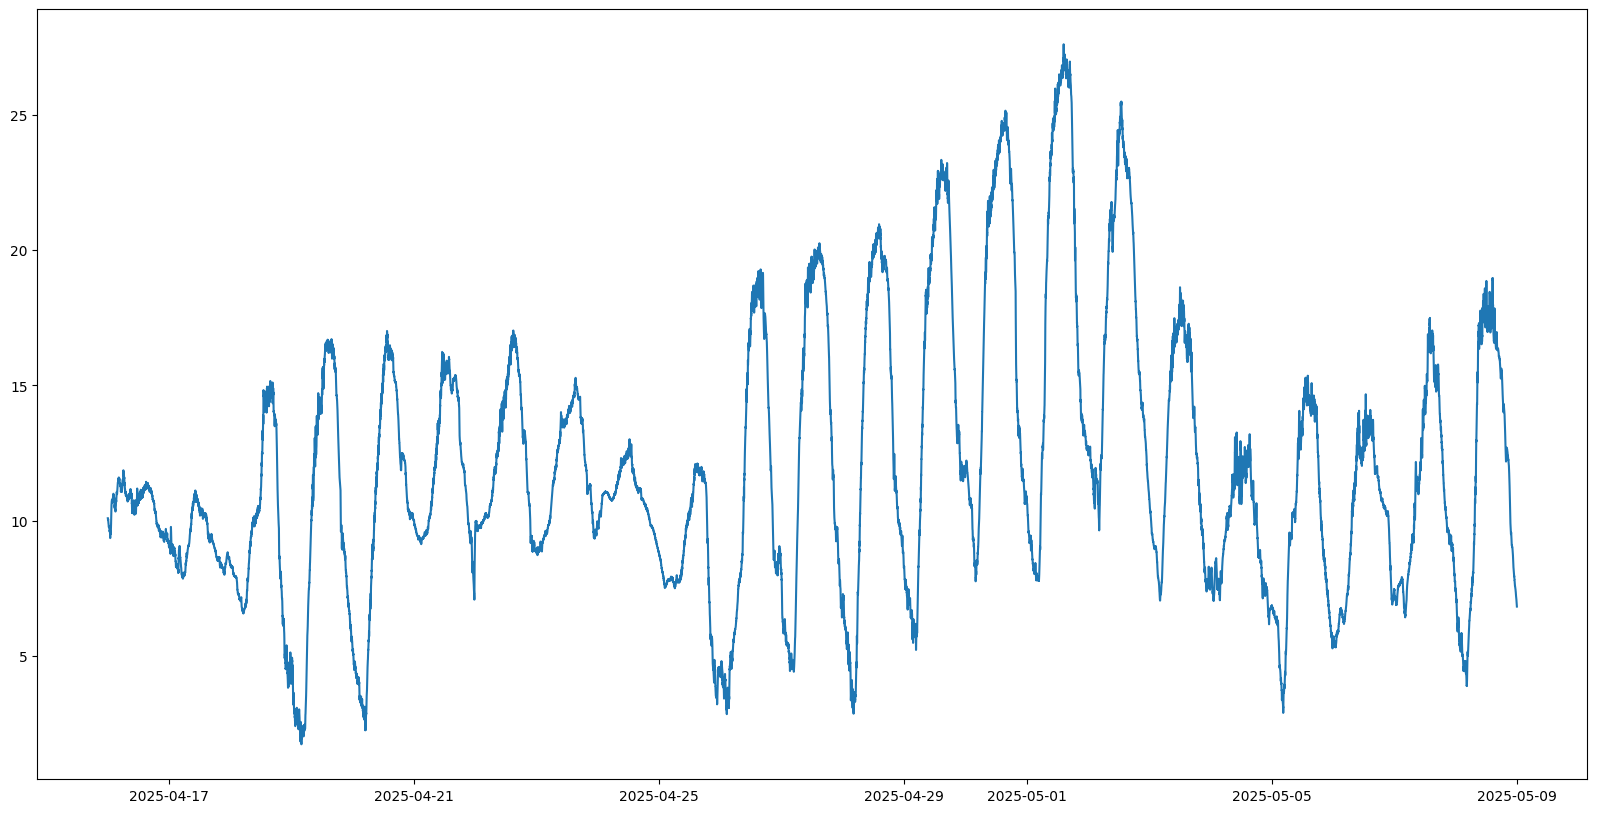

In [515]:
stream_ids = [48649, 48655,48656,48657,48658,48661,48662,48674,48666,48659,48673]# WD_1_2_1: wind direction

# order of stream id to meaning
# TA_2_1_1:TA, RH_1_1_1:RH,SW_IN_1_1_1:G_Gh, SW_OUT_1_1_1:G_Lup,LW_IN_1_1_1:G_Lin,LW_OUT_1_1_1:ground_reflected_radation?,SW_DIF_1_1_1: G_Dh,SW_DIR_1_1_1:G_Gn2,WS_1_2_1:FF,P_1_1_7:rain,LW_OUT_1_1_1: ground_reflected_radation?,G_BN_1_1_1:G_Bn,G_GC_1_1_1:G_Gc,EXTRATERRAD_1_1_1:GEX,SW_IN_MOD_1_1_1:G_Ghmod,PAR_IN_MOD_1_1_1:PAR,SN_IN_MOD_1_1_1:Snd,WS_DIR_MOD_1_2_2:wind_direction,WS_SPD_MOD_1_2_2:wind_speed
# nog toevoegen: hs, AZ, G_Gn2,G_Dh,FF,date_time
#verder: temp naar kelvin, aanpassen naar seconde, datetime leesbaar 
#GET DATA TA_2_1_1 VEENKAMPEN 2023-01-01 to 2023-01-02
''' What data do i have and what does it mean
    dofm: day of month
    dofy: day of the year
    hi: hour of the day
    Ta: temperature of air
    G_Gh: 
    Td: dew point temperature
    RH: relative himidity (%)
    G_DH: 
    FF: wind speed (m/s)
    DD: wind direction
    Lin: longwave radiation from the atmosphere
    RR: preciptation
    Sd: effective sunshine duration
    N: cloud cover
    hs: solar altitude
    TL: 
    G_Bn: 
    G_Gc: 
    GEX: Extraterrestrial radiation
    G_Ghmod: 
    PAR: Photosynthetically active radiation
    Snd: 
    Lup: Longwave (thermal, infrared) radiation on horizontal surface emitted from the earth's surface (longwave 
        outgoing) wavelength > 3 µm
'''
data_frame = []
stream_header= ['date_time','Ta','RH', 'G_Gh', 'G_Lup','G_Lin','G_Dh','G_Gn2','FF','rain','G_ref','wind_direction']	
desired_dates = '?from=2025-04-16&to=2025-05-09'
# Define the timespan (start and end dates)
start_date = '2025-04-16'  # Today's date
end_date = '2025-05-09'    # Next day as an example
stream_count = -1 
for stream_id in stream_ids:
    stream_count += 1
    END_POINT = f'/wp-json/maq/v1/streams/{stream_id}/measures{desired_dates}'
    response = requests.get(HOST_KL + END_POINT, headers=headers)
    libr = response.json()
    data = pd.DataFrame(libr['measures'])
    #print(data)
    values = data['value']
    if data_frame == []:
        dates = data['timestamp']
        #datetime_strings = dates.strip().split('\n')
        time_values = pd.to_datetime(dates)
        #time_values = pd.DataFrame({'datetime_str': datetime_strings})
        #df['datetime'] = pd.to_datetime(df['datetime_str'])
        data_frame.append(time_values)
        data_frame.append(abs(data['value']))
    else:
        data_frame.append(abs(data['value']))
    #print(data_frame)
    #df = pd.DataFrame(data['measures'])
    #data_frame.append(df['value'])
END_POINT = '/wp-json/maq/v1/streams/48649/measures?from=2023-01-01&to=2023-01-02'
get = requests.get(HOST_KL + END_POINT, headers=headers)
#print(get)
#print(get.text)
#Alternatively: Use it as a dictionary
a = get.json()
#a['measures']
response = requests.get(HOST_KL + END_POINT, headers=headers)
data = response.json()

# Convert directly to DataFrame
#df = pd.DataFrame(data['measures'])
#for i in range(len(data_frame)):
      
data = pd.DataFrame(np.transpose(data_frame))
#data.rename(columns={0:stream_header[0],1:stream_header[1], 2:stream_header[2]},inplace=True)
for i, header in enumerate(stream_header):
    data.rename(columns={i: header}, inplace=True)
#for i in range(len(stream_header)):
#     print(i,stream_header[i])
#     data.rename(columns={i:stream_header[i]})
#df1 = pd.DataFrame([np.array(sublist).flatten() for sublist in data_frame]) #change this order to get the right shape
#df1.describe()
#data.date_time
plt.plot(data.date_time, data.Ta, label='Ta')


0        114.496776
1        114.564799
2        114.632194
3        114.698958
4        114.765090
            ...    
33116    107.491057
33117    107.554376
33118    107.617103
33119    107.679237
33120    107.740775
Name: hs, Length: 33121, dtype: float64

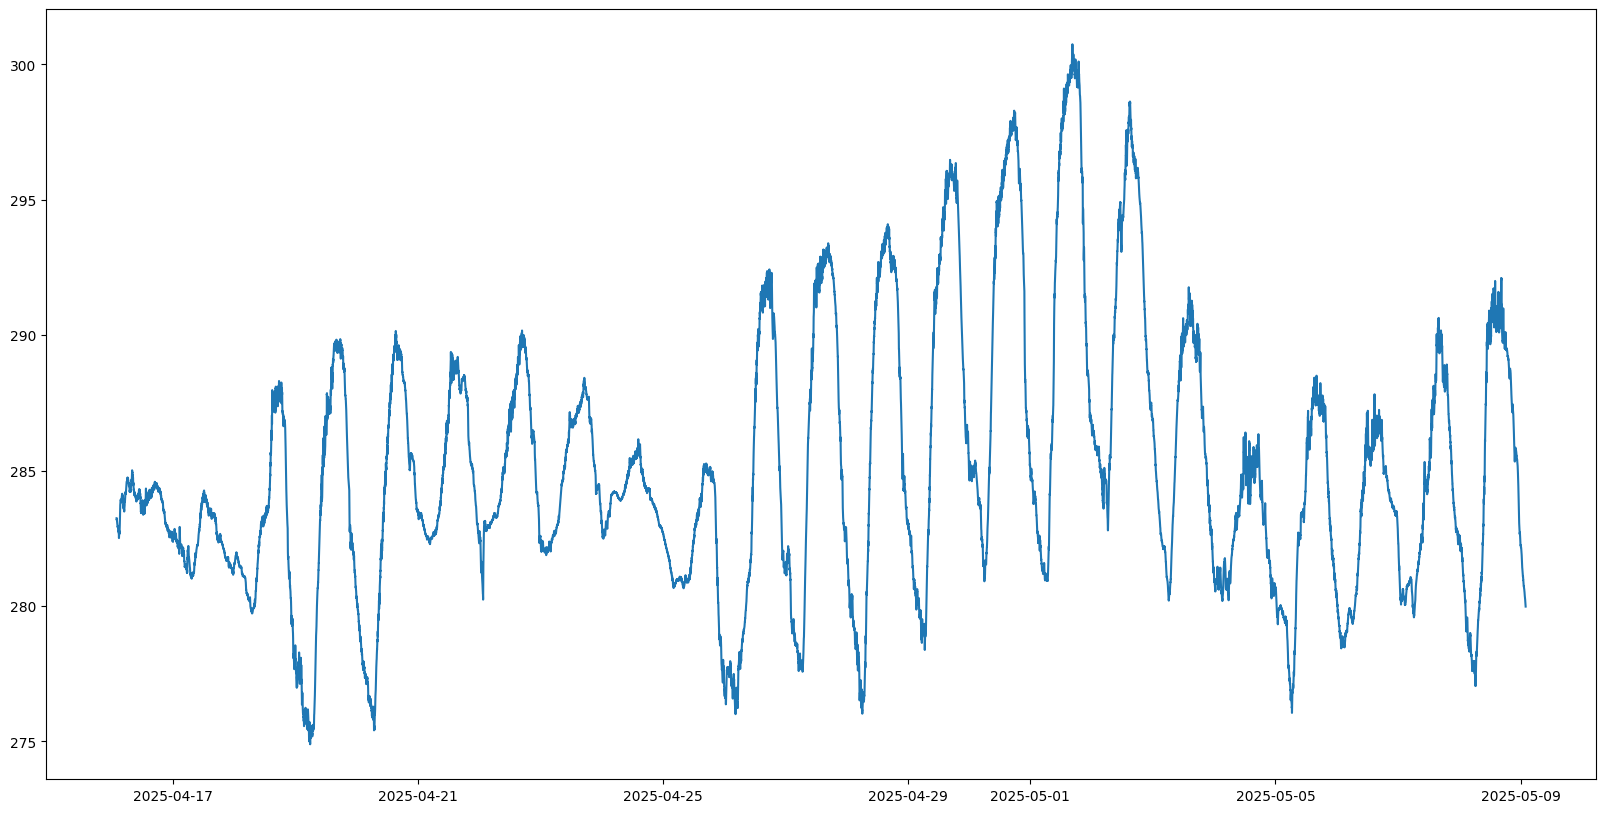

In [516]:
# calculate solar zenith and azimuth
from datetime import datetime, timedelta

# Define coordinates for a location in the Netherlands
# Amsterdam coordinates as an example
latitude = 51.9691
longitude = 5.6653
# Create a DatetimeIndex with minute frequency
time_index = pd.date_range(start=start_date, end=end_date, freq='1min', tz='Europe/Amsterdam')

# Calculate solar position
solar_position = pvlib.solarposition.get_solarposition(time_index, latitude, longitude)

# Extract zenith and azimuth
zenith = solar_position['zenith']
azimuth = solar_position['azimuth']
data['hs'] = np.array(zenith)
data['Az'] = np.array(azimuth)
data['Ta'] = data.Ta + 273.15 #convert to kelvin
data.date_time = data.date_time+pd.Timedelta(hours=2)
# G_Gh is nog negatief
# G_Dh is ook negatief

plt.plot(data.date_time, data.Ta, label='Ta')
#print(len(data.Ta),len(zenith))
data.hs

C:\Users\matth\AppData\Local\Temp\ipykernel_9960\4068972709.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  logger_data = pd.read_csv('9-5-2025.csv',


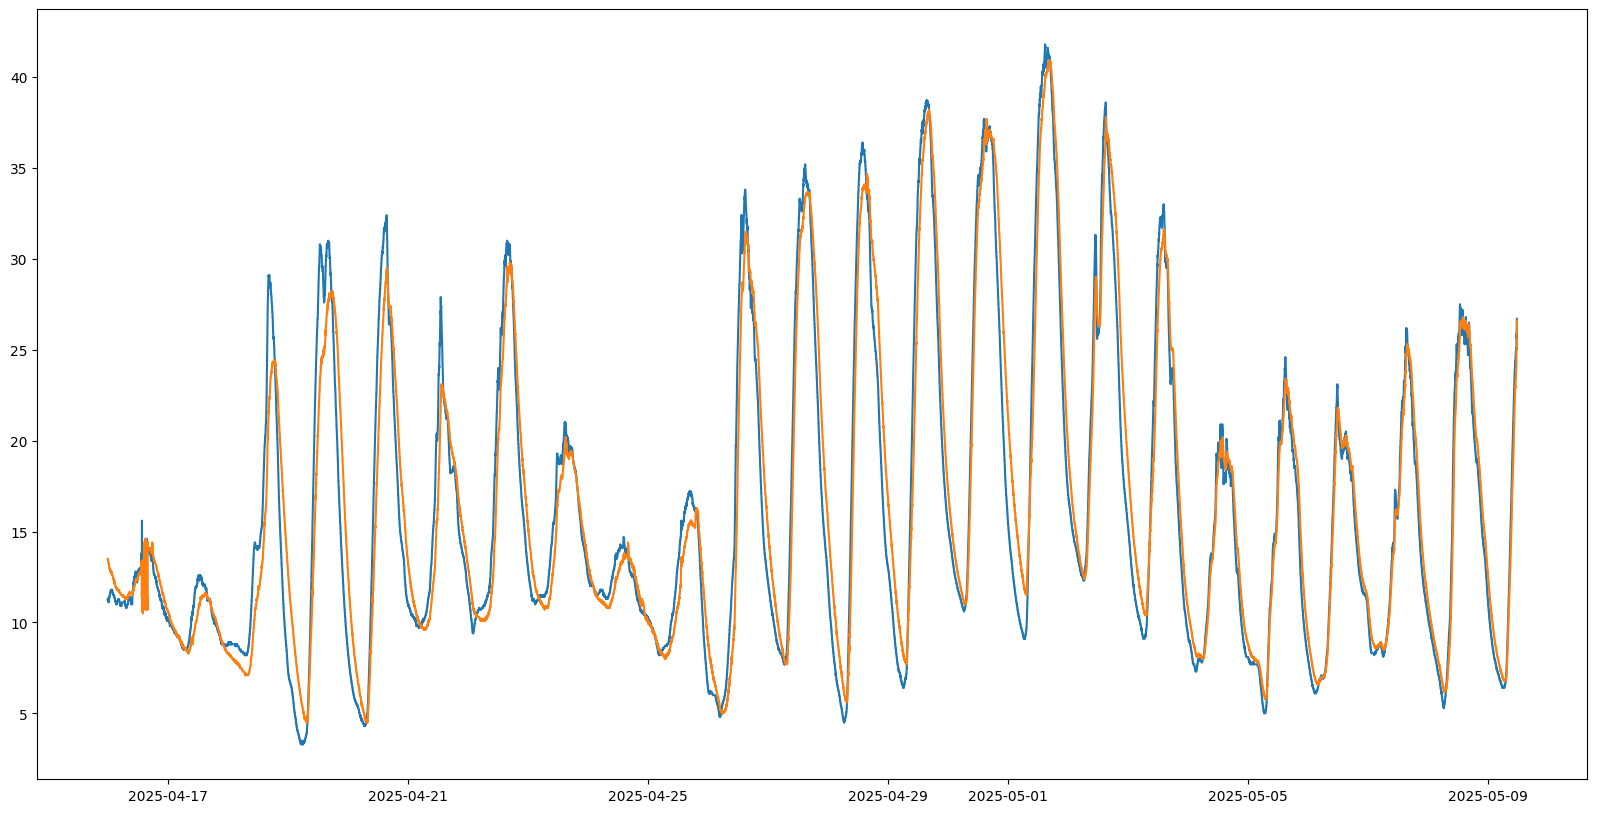

In [517]:
#extract logger data, this works!
logger_data = pd.read_csv('9-5-2025.csv', 
                 sep=';',            # Specify semicolon as separator
                 decimal=',',        # Specify comma as decimal point
                 parse_dates=['Datum'],
                 date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))  # Convert date column to datetime
logger_data.describe()
plt.plot(logger_data['Datum'], logger_data['T HE in[°C]'],logger_data['Datum'], logger_data['T HE out[°C]'])

In [518]:
# defining setup choices
time_int = 60
#t_span = np.array((data.dy*24+data.h-24)*time_int)
t_span = data['date_time']
t_start = 60#24*6*30+5*24
t_span = t_span[t_start:t_start+24*60*60]
t0 = [0]
y0 = [data.Ta[t_start]]
#y0 = [273.15+13]
p = [1, 1]
Temp_cap_low = False                     # True if we want to set a value that can not be exceeded
Temp_cap_high = False
T_cap = 35+273.15
T_cap_low = 15+273.15
dilution_rate = 0 #V_reactor*0.0833/3600                 # random suggestion
harvest_hours = [12,13,14,15,16,17]                       # the hours when broth can be harvested
int_method = 'LSODA'                                        # what integration method is used
case = 'Multiple'                                               # with options Flat, Round, Multiple/else
T_in = 273.15+13                        # arbitrary inlet temperature fresh medium
glass_thickness = 2.2*10**-3 
L = 1                               # an arbitraty length of a meter of reactor is used
R_reactor = (65*(10**-3)-2*glass_thickness)/2           # according to manufacurer
V_reactor = L*math.pi*R_reactor**2      # reactor volume in m^3 
aeration_rate = 1*V_reactor/time_int       #arbitrary aeration rate in volume/time unit  
y0
D_reactor = 2*R_reactor             # reactor diameter
s_reactor = 0.245-0.065             # distance between centers of two neigouring cylinders
t_span=np.arange(t_start,len(data.date_time)*60,60)
len(t_span)

33120

In [519]:
# defining emperical constants
sigma = 5.670374419*10**-8          # boltzman constant 
tau_reactor = 0.92                  # transmittance according to manufacturer taken when not filled with water
epsilon_reactor = 0.98             # emsivity of water (laboratory determinations of water surface emissivity)
rho_reactor = 997                            # desity of water
cp_reactor = 4186                          # soortelijke warmte water volgens wikipedia J/(Kg*K)

epsilon_air = 1                     # value used in paper mechanistic modeling 
R = 8.314                                        # ideal gas constant
A = 8.07131                                      # constant for antoines law found on the wikipedia page 
B = 1730.63                                      # constant for antoines law found on the wikipedia page 
C  = 233.426 - 273.15                            # constant for antoines law found on the wikipedia page                       
heat_vap = 40.66*1000                                # heat of vaporization according to table on wikipedia (J/mol)
albedo = 0.3                            # according to wikipedia for grassland
A_cross = 2*R_reactor*L                 # Area cross section
flow_speed_reactor = 0.28                  # vary 0.1-1 m/s
g = 9.81                    # gravity constant 
a_a = 23.07*10**-6                      # air diffusifiy
v_a =  1.48*10**-5                     #air kinematic viscosity 
lambda_a = 0.0260                     # air thermal conductivity accordig to wikipedia
Pr = 0.7                            #given in paper for a value at 25 C
 # forced convection
mu_reactor = 1*10**-3               # viscosity water (kg m/s) 
mu_air =      1.81*10**-5           # viscosity air  (kg m/s)
rho_air = 1.204                     #kg/m3
lambda_glass = 1.2                  # termal resistance glass (W/(m*K)) according to brochure 
k_reactor = 0.598                       # thermal conductivity water (W/(mK))
k_air = lambda_a
mu_a = v_a 
rho_a = 1.293
cp_air = 1000.5                     # specific heat air (J/kg/K)
saved_fluxes = []
T_air_in = 273.15+40                # made up number, higher because of pressure added by pump putting the air into the system
tube_orientation = 90               # position of the tube with respect to the position of the sun in degrees 
tube_tilt = 0                       # tilt of the tube with respect to the ground
flow_rate = 0.28                       # arbitrary value (m/s) 

zeta = 1.96                         # friction factor of straight tube of 5.5 m according to LGEM  
round_factor = math.pi/2                 # amount of radiation recieved extra because of the round shape compared to flat surface 

In [520]:
# Returns the amount of sunlight that is reflected back basaed on the incoming angle. This is based on fresnels law
def fresnel(theta_1,n1,n2):
    try:
        theta_2 = np.arcsin(n1/n2*np.sin(theta_1))
    except:
        return 1
    #theta_2 = np.arcsin(n1/n2*np.sin(theta_1))                # from snells law
    if n1 * np.sin(theta_1)>n2:
        return 1
    else:  
        R_s = ((n2*math.cos(theta_1)-n1*math.cos(theta_2))/(n2*math.cos(theta_1)+n1*math.cos(theta_2)))**2 
        R_p = ((n2*math.cos(theta_2)-n1*math.cos(theta_1))/(n2*math.cos(theta_2)+n1*math.cos(theta_1)))**2
        #R_s = (np.tan(theta_2-theta_1)**2)/(np.tan(theta_2+theta_1)**2)
        #R_p = (np.sin(theta_2-theta_1)**2)/(np.sin(theta_2+theta_1)**2)
        R_tot = (R_s+R_p)/2
        #print(R_s,R_p)
        return R_tot

def average_reflection(theta_1):            # takes into account lamberts cosine law
    ref = fresnel(theta_1)#*math.cos(theta_1)
    return ref

def sumfunc(x):
    return x

def calc_angle(az, zen):
    theta = np.arcsin((np.sin(zen)*np.sin(az))/math.sqrt((np.sin(zen)*np.sin(az))**2+np.cos(zen)**2))+math.pi/2
    return theta
#trial = calc_angle(0,math.pi/2)
#print(trial)
n_air =    1                 #refractive index of air according to wikipedia
n_glass = 1.473                   #refractive index of glass according to manufacturer
n_water = 1.33
fresnel(math.pi/3,n_air,n_glass)
int_range = np.arange((0),(math.pi/2),0.001)
sum_int = 0 
count_args = 0
for i in int_range:
    local_ref = fresnel(i,n_air,n_glass)
    print(local_ref)
    sum_int +=local_ref
    count_args +=1
    print(count_args)
sum_int/count_args    #print(fresnel(i,n_air,n_glass))
tau_reactor = 1-fresnel(math.pi/3,n_air,n_glass)

0.03658255622510417
1
0.036582556225119744
2
0.03658255622535343
3
0.03658255622636615
4
0.036582556229092705
5
0.03658255623484184
6
0.03658255624529641
7
0.03658255626251317
8
0.03658255628892305
9
0.03658255632733104
10
0.03658255638091643
11
0.03658255645323272
12
0.03658255654820779
13
0.036582556670143984
14
0.03658255682371822
15
0.03658255701398212
16
0.036582557246362
17
0.036582557526659204
18
0.03658255786105011
19
0.036582558256086264
20
0.03658255871869461
21
0.03658255925617765
22
0.03658255987621355
23
0.03658256058685635
24
0.03658256139653621
25
0.036582562314059576
26
0.03658256334860932
27
0.03658256450974511
28
0.0365825658074035
29
0.03658256725189819
30
0.03658256885392038
31
0.036582570624538874
32
0.03658257257520048
33
0.0365825747177301
34
0.036582577064331295
35
0.036582579627586244
36
0.03658258242045634
37
0.036582585456282304
38
0.03658258874878459
39
0.036582592312063664
40
0.03658259616060039
41
0.03658260030925635
42
0.036582604773274206
43
0.0365826095

In [521]:
# calculate the reflection of diffuse light
def integrand(theta, n_air, n_glass):
    return  fresnel(theta, n_air, n_glass)*math.cos(theta)*math.sin(theta)
func = lambda theta: integrand(theta, n_air, n_glass)
refl = 2*integrate.quad(func,0,math.pi/2)[0]
tau_reactor = 1-refl
fresnel(1,n_air,n_glass)
refl
func2 = lambda theta: integrand(theta, n_glass, n_air)
refl2 = 2*integrate.quad(func2,0,math.pi/2)[0]
refl2

C:\Users\matth\AppData\Local\Temp\ipykernel_9960\3992559038.py:4: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n1/n2*np.sin(theta_1))


0.579575372826081

In [522]:
def direct_solar_rad(t,y,time_index): #in the paper they do something with a formfactor here, check later why
    x_sun = math.cos(math.radians(data.hs[time_index]))*math.sin(math.radians(data.Az[time_index]))
    y_sun = math.cos(math.radians(data.hs[time_index]))*math.cos(math.radians(data.Az[time_index]))
    z_sun = math.sin(math.radians(data.hs[time_index]))
    o = math.sqrt(y_sun**2+z_sun**2)
    a =abs(x_sun)
    if data.hs[time_index]>0 or math.isnan(data.hs[time_index]):
        #angle = math.atan(o/a)
        angle = math.acos(z_sun/1)
    else:
        return 0 
    if case == 'Flat':
        Q = (1-fresnel(angle,n_air,n_glass))*epsilon_reactor*R_reactor*2*L*data.G_Gh[time_index]
    elif case == 'Round':
        angle = math.asin(x_sun)
        func = lambda theta: integrand(theta, n_air, n_glass)
        refl = 1-(2*integrate.quad(func, angle, math.pi/2)[0]/(math.pi/2-angle))
        Q = refl*epsilon_reactor*R_reactor*math.pi*L*data.G_Gn2[time_index]*math.cos(angle)
        #Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Gh[time_index]
    else:
        angle = math.asin(x_sun)
        func = lambda theta: integrand(theta, n_air, n_glass)
        refl = 1-(2*integrate.quad(func, angle, math.pi/2)[0]/(math.pi/2-angle))
        Q = refl*epsilon_reactor*R_reactor*math.pi*L*data.G_Gn2[time_index]*math.cos(angle)
    #print(time_index)    
    return Q

#math.sin(data.hs[18])*math.cos(data.Az[18])
#for i in t_span:
    print(direct_solar_rad(1,273,i/3600))
    

#V_reactor*20*1000
direct_solar_rad(1,273,600)
data.G_Gh


0         1.52
1        1.531
2        1.466
3        1.412
4        1.337
         ...  
33116    1.898
33117    1.887
33118    1.887
33119    1.877
33120    1.877
Name: G_Gh, Length: 33121, dtype: object

In [523]:
def diffuse_solar_rad(t,y,time_index):
    if case == 'Flat':
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Dh[time_index]
    elif case == 'Round':
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Dh[time_index]*round_factor
    else:
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_Dh[time_index]*F_round_multiple  
    return Q

In [524]:
def infrared_rad_air(t,y,time_index):
        #Q = tau_reactor*epsilon_reactor*epsilon_air*2*math.pi*R_reactor*L*sigma*(data.Ta[time_index])**4 
        if case == 'Flat':
                Q = data.G_Lin[time_index]*R_reactor*2*L*tau_reactor*epsilon_reactor
        elif case == 'Round':
                Q = data.G_Lin[time_index]*R_reactor*2*L*tau_reactor*epsilon_reactor*round_factor 
        else:
                Q = data.G_Lin[time_index]*R_reactor*2*L*tau_reactor*epsilon_reactor*F_round_multiple
        return Q

In [545]:
def reactor_infrared_radiation(t,y,time_index):
    if case == 'Flat':
        Q = sigma*L*(2*R_reactor*2)*epsilon_reactor*y**4                                          # consider cross section, radiation going both up and down
    elif case == 'Round':
        Q = sigma*L*(2*R_reactor*math.pi)*epsilon_reactor*y**4#*(1-reactor_to_reactor(t,y,time_index))               # consider view factor to two neighbouring cylinders
        #Q = sigma*tau_reactor*epsilon_reactor*y**4*L*(2*R_reactor*2)                                      # consider full area around the tube 
    else:
        Q = sigma*epsilon_reactor*y**4*L*(2*R_reactor*math.pi)*(1-2*F_between_reactor)               # consider view factor to two neighbouring cylinders
    return -Q
(1-2*F_between_reactor)

0.8917871893377312

In [526]:
# Returns the amount of heat coming into the system based on measured ground radiation 
def ground_reflected_rad(t,y,time_index):
    if case == 'Flat':
        Q=tau_reactor*epsilon_reactor*data.G_Lup[time_index]*2*R_reactor*L              # Area is cross section
    elif case == 'Round':
        Q = tau_reactor*epsilon_reactor*data.G_Lup[time_index]*2*R_reactor*L*round_factor 
    else:
        Q =  tau_reactor*epsilon_reactor*data.G_Lup[time_index]*2*R_reactor*L*F_round_multiple
    #Q = tau_reactor*epsilon_reactor*data.Lup[time_index]*2*R_reactor*L             # can be adapted so that the area can include view factor
    return Q
F_round_multiple

1.4008160412944528

In [527]:
def ground_infrared_radiation(t,y,time_index):      #assume the Lup value is indeed the emmited ground radiation
    if case == 'Flat':
        #Q = albedo*(data.G_Dh[time_index]+data.G_Lin[time_index]+data.G_Gh[time_index])*2*R_reactor*L*tau_reactor*epsilon_reactor
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*data.G_ref[time_index]
    elif case=='Round':
        #Q = Q = albedo*(data.G_Dh[time_index]+data.G_Lin[time_index]+data.G_Gh[time_index])*2*R_reactor*L*tau_reactor*epsilon_reactor*round_factor
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*round_factor*data.G_ref[time_index]
    else: 
        Q = tau_reactor*epsilon_reactor*R_reactor*2*L*F_round_multiple*data.G_ref[time_index]
    return Q

In [528]:
def convection(t,y,time_index):
    #new constants 
    g = 9.81                    # gravity constant 
    a_a = 23.07*10**-6                      # air diffusifiy
    v_a =  1.48*10**-5                     #air kinematic viscosity 
    k_reactor = 0.598                       # thermal conductivity water (W/(mK))
    lambda_a = 0.0260                     # air thermal conductivity accordig to wikipedia
    Pr = 0.7                        #given in paper for a value at 25 C
    k_air = lambda_a
    # forced convection
    mu_reactor = 1*10**-3               # viscosity water (kg m/s) 
    mu_air =      1.81*10**-5           # viscosity air  (kg m/s)
    rho_air = 1.204                     #kg/m3
    mu_a = v_a 
    rho_a = 1.293
    cp_air = 1000.5                     # specific heat air (J/kg/K)

    # Calculating dimensionless numbers
    Re_reactor = rho_reactor*flow_speed_reactor*(2*R_reactor)/mu_reactor
    #Pr_reactor = 50000/((y-273.15)**2+155*(y-273.15)+3700)          # according to wikipedia
    Re_air = rho_air*data.FF[time_index]*2*(R_reactor+glass_thickness)/mu_air           # formula according to wikipedia 
    #Pr_air = 10**9/(1.1*(data.Ta[time_index]-273.15)**3-1200*(data.Ta[time_index]-273.15)**2+322000*(data.Ta[time_index]-273.15)+1.393*10**9) # formula according to wikipedia
    #Ra = (g*abs(y-data.Ta[time_index])*L**3)/(a_a*v_a*data.Ta[time_index])
    #Re = rho_a*2*R_reactor*data.FF[time_index]/mu_a
    #h_forced = lambda_a/(2*R_reactor)*(0.3+0.62*(Re**0.5)*(Pr**(1/3))/(1+(0.4/Pr)**(2/3))**0.25)*(1+(Re/282000)**(5/8))**0.8
    
    #old calculation
    #h_co = lambda_a/L*(0.825+(0.387*Ra**(1/6))/((1+(0.492/Pr)**(9/16))**8/27))**2
    #Q = h_forced*(data.Ta[time_index]-y)*math.pi*R_reactor*L
    Pr_air = cp_air*mu_air/k_air
    Pr_reactor = cp_reactor*mu_reactor/k_reactor



    #Dont forget the case where there is no wind and therefore natural convection only occurs
    if Re_air<= 4000:                   # according to tabel 7.2 in book 'fundamentals of heat and mass transfer'
        C = 0.683
        m = 0.385
    elif Re_air<=40000:
        C = 0.193
        m = 0.618
    elif Re_air<=4000000:
        C = 0.027
        m = 0.805
    else:
        return 0
    if case == 'Flat':
        Nu_air = C*(Re_air**m)*(Pr_air**(1/3))
    elif case == 'Round':
        Nu_air = C*(Re_air**m)*(Pr_air**(1/3))
    else:
        C = 0.0633
        m = 0.752
        Nu_air = C*(Re_air**m)*(Pr_air**(1/3))
    Nu_inside = 0.027*(Re_reactor**0.8)*(Pr_reactor**0.33)*(L+0.7*((2*R_reactor))/L)   # for Re>2000 accroding to reader transfer processes
    R_inside = 1/(Nu_inside*k_reactor*math.pi*L)                       
    R_glass = math.log((R_reactor+glass_thickness)/R_reactor)/(2*math.pi*L*lambda_glass)    # according to tabel 7.2 in book 'fundamentals of heat and mass transfer' 3.26
    R_outside = 1/(Nu_air*k_air*math.pi*L)
    #Ra = g*beta*()
    #Nu_air_free = C_free*Ra^n                                               # formula 9.33 in the bible
    
    if data.FF[time_index]==0:
        R_outside = 0.001
        return 0
        #R_outside = 1/(Nu_air_free*k_air*math.pi*L)
    else:
        R_outside = 1/(Nu_air*k_air*math.pi*L)
    Rtot = R_inside+R_glass+R_outside
    Q = (data.Ta[time_index]-y)/Rtot
    #Q = data.Ta[time_index]-y
    return Q
convection(1,292,15)    

-7.428081576057532

In [529]:
# Returns the amount of energy required to get the aeration air to the reactor temperature
def aeration(t,y,time_index):           #the assumption is that all the air takes the temperature of the reactor
    Q = aeration_rate*(T_air_in-y)*cp_air*rho_air
    return 0 #Q
aeration(1,292,15) 

0

In [530]:
def Q_evap(t,y,time_index):             #perfect equilibrium of water and air is reached at the outlet
    vap_pres_in = 10**(A-(B/(C+data.Ta[time_index])))       #antoines law
    moles_in = vap_pres_in*aeration_rate*(data.RH[time_index]/100)/(R*data.Ta[time_index])
    vap_pres_out = 10**(A-(B/(C+y)))
    moles_out = vap_pres_out*aeration_rate/(R*y) 
    Q = (moles_out-moles_in)* heat_vap
    return 0#-Q

In [531]:
def pump_force(t,y,time_index):     
    press_loss  = zeta*rho_reactor/(2*5.5)*flow_rate**2
    Q = press_loss*V_reactor*flow_rate/L
    return Q
pump_force(1,27,1)

0.011247804734129702

In [532]:
def reactor_to_reactor(t,y,time_index):
    R = 1
    S = ((s_reactor-(2*R_reactor))/R_reactor)
    C = 1+R+S
    Fij = 1/(2*math.pi)*(math.pi+(C**2-(R+1)**2)**0.5-(C**2-(R-1)**2)**0.5+(R-1)*math.acos((R/C)-(1/C))-(R+1)*math.acos((R/C)+(1/C)))
    return Fij
F_between_reactor = reactor_to_reactor(1,1,1)

In [533]:
def ground_to_reactors(t,y,time_index):                     # according to table 13.1 
    Fij= 1-(1-(D_reactor/s_reactor)**2)**0.5+D_reactor/s_reactor*math.atan(((s_reactor**2-D_reactor**2)/(D_reactor**2))**0.5)
    return Fij
ground_to_reactors(1,1,1)*s_reactor/(2*R_reactor)
F_round_multiple = ground_to_reactors(1,1,1)*s_reactor/(2*R_reactor)

In [534]:
#harvesting energy
def flow_harvest(t,y,time_index):
    if data.date_time[time_index].hour in harvest_hours:
        Q = dilution_rate*(T_in-y)*rho_reactor*cp_reactor     # Since the dilution rate is expressed as percentage of volume, no volume included here
    else:
        Q = 0
    return 0#Q

In [535]:
def added_heat(t,y,time_index,total_flux):
    if Temp_cap_low:
        if y<T_cap_low and total_flux<0:
            Q = -total_flux
            #Q = ((T_cap_low-y)/3600)*(rho_reactor*cp_reactor*V_reactor)-total_flux
        elif (y+total_flux*3600/(cp_reactor*rho_reactor*V_reactor))<T_cap_low and total_flux<0:
            Q =  ((T_cap_low-y)/3600)*(rho_reactor*cp_reactor*V_reactor)-total_flux
        else:
            Q  = 0
        return Q
    else:
        Q=0
    return Q
(added_heat(1,273.15+21,15,-3.5)-3.5)*3600/(rho_reactor*cp_reactor*V_reactor) 

-1.0467453326975462

In [536]:
def removed_heat(t,y,time_index,total_flux):                # if the temperature exceeds the maximum and Temp_cap is true, the amount of extra heat gained is removed 
    if Temp_cap_high:
        if y >T_cap and total_flux>0:
            #Q = (T_cap-y)*cp_reactor*rho_reactor*V_reactor/3600-total_flux
            Q = -total_flux
            #Q= ((T_cap-y)/3600)*(rho_reactor*cp_reactor*V_reactor)-total_flux
        elif (y+total_flux*3600/(rho_reactor*cp_reactor*V_reactor))>T_cap and total_flux>0:
            Q =  ((T_cap-y)/3600)*(rho_reactor*cp_reactor*V_reactor)-total_flux
        else:
            Q = 0
        return Q
    else:
        Q = 0
    return Q
check = 3.5*3600/(cp_reactor*rho_reactor*V_reactor)
removed_heat(1,273.15+34,15,3.5)

0

In [537]:
def heat_bal(t,y,p):
    '''creating the measured values at time t as input'''
    time_index = (t//time_int)                    # the algorithm loop over this heat balance more often than just for every step, therefore the // to indix to the right value
    rest = (time_index%time_int)/time_int
    u = data.Ta[time_index]
    Q_react_infrared = reactor_infrared_radiation(t,y,time_index)
    Q_direct_solar_rad = direct_solar_rad(t,y,time_index)
    Q_diffuse_solar_rad = diffuse_solar_rad(t,y,time_index)
    Q_air_infrared = infrared_rad_air(t,y,time_index)
    Q_harvest = flow_harvest(t,y,time_index)
    Q_ground_radiation = ground_infrared_radiation(t,y,time_index)
    Q_evaporation = Q_evap(t,y,time_index)
    Q_ground_reflected = ground_reflected_rad(t,y,time_index)
    Q_convection =  convection(t,y,time_index)
    Q_aeration = aeration(t,y,time_index)
    Q_pump = pump_force(t,y,time_index)
    saved_fluxes.append([time_index])
    '''To be implemented: pump, aeration  '''
    dxdt = (Q_direct_solar_rad+Q_diffuse_solar_rad+Q_ground_radiation+Q_harvest+Q_air_infrared+Q_ground_reflected+Q_react_infrared+Q_evaporation+Q_convection+Q_aeration+Q_pump)
    max_capped_heat = removed_heat(t,y,time_index,dxdt)
    min_capped_heat = added_heat(t,y,time_index,dxdt)
    return (dxdt)/(rho_reactor*cp_reactor*V_reactor)
heat_bal(7200,290,1)

-0.002971570869586916

In [538]:
len(t_span )

33120

33120

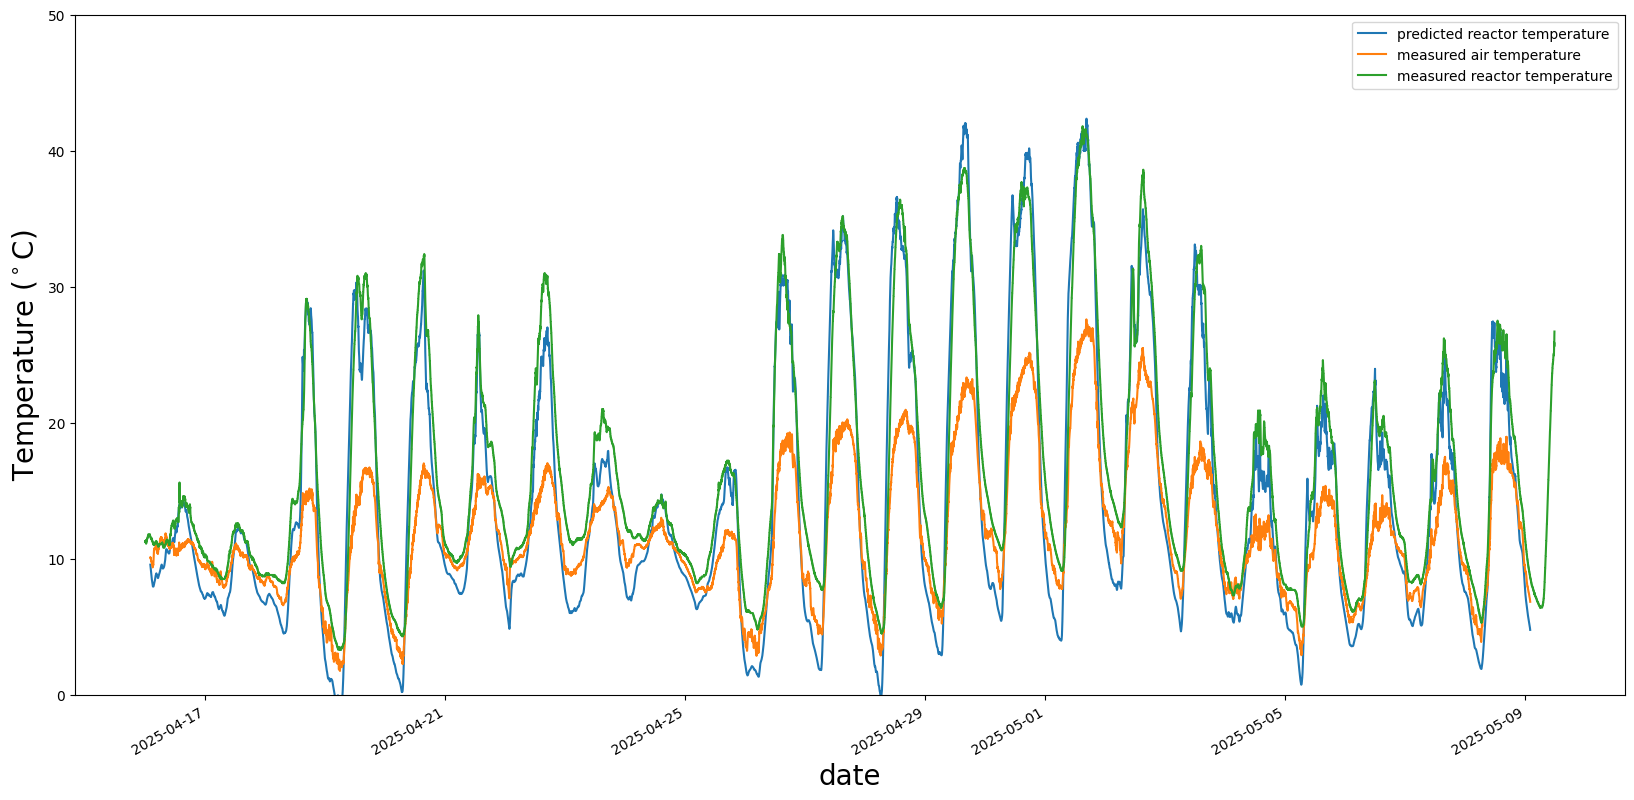

In [539]:
#the rest can be implemented later 
solver = integrate.solve_ivp (heat_bal,(t_span[0],t_span[-1]) ,y0, args = [0.01],t_eval=t_span, method=int_method,max_step=60)
t_vals = solver.t
y_vals_check = solver.y
y_vals = y_vals_check[0]                #Did this to overcome the problem that the values are stored in a matrix. 
hours = t_span/(time_int*24)
t_array = np.arange(0,len(y_vals),1)
#air_temp = data.Ta[hours*24]
#t_vals_days = 24/hours
#time_values = data.date_time[t_span/time_int]
font = 20 

##          plot results
plt.xlabel('date',fontsize=font)
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Temperature ($^\circ$C)',fontsize=font)
#plt.title('photobioreactor temperature profile over time for case: '+case)
plt.plot(data.date_time[t_array], y_vals-273.15,data.date_time,data.Ta-273.15,logger_data['Datum'],logger_data['T HE in[°C]'])
#plt.plot(time_values,y_vals[:-1]-273.15)
plt.gcf().autofmt_xdate()
plt.legend(['predicted reactor temperature','measured air temperature','measured reactor temperature'])
plt.ylim(0,50)
#data.date_time[t_array]
time_values = time_values[0:-1] # needed for printing the fluxes
len(t_span)

error in calculation


0       2025-04-16 00:00:00+00:00
1       2025-04-16 00:01:00+00:00
2       2025-04-16 00:02:00+00:00
3       2025-04-16 00:03:00+00:00
4       2025-04-16 00:04:00+00:00
                   ...           
33115   2025-05-08 23:55:00+00:00
33116   2025-05-08 23:56:00+00:00
33117   2025-05-08 23:57:00+00:00
33118   2025-05-08 23:58:00+00:00
33119   2025-05-08 23:59:00+00:00
Name: timestamp, Length: 33120, dtype: datetime64[ns, UTC]

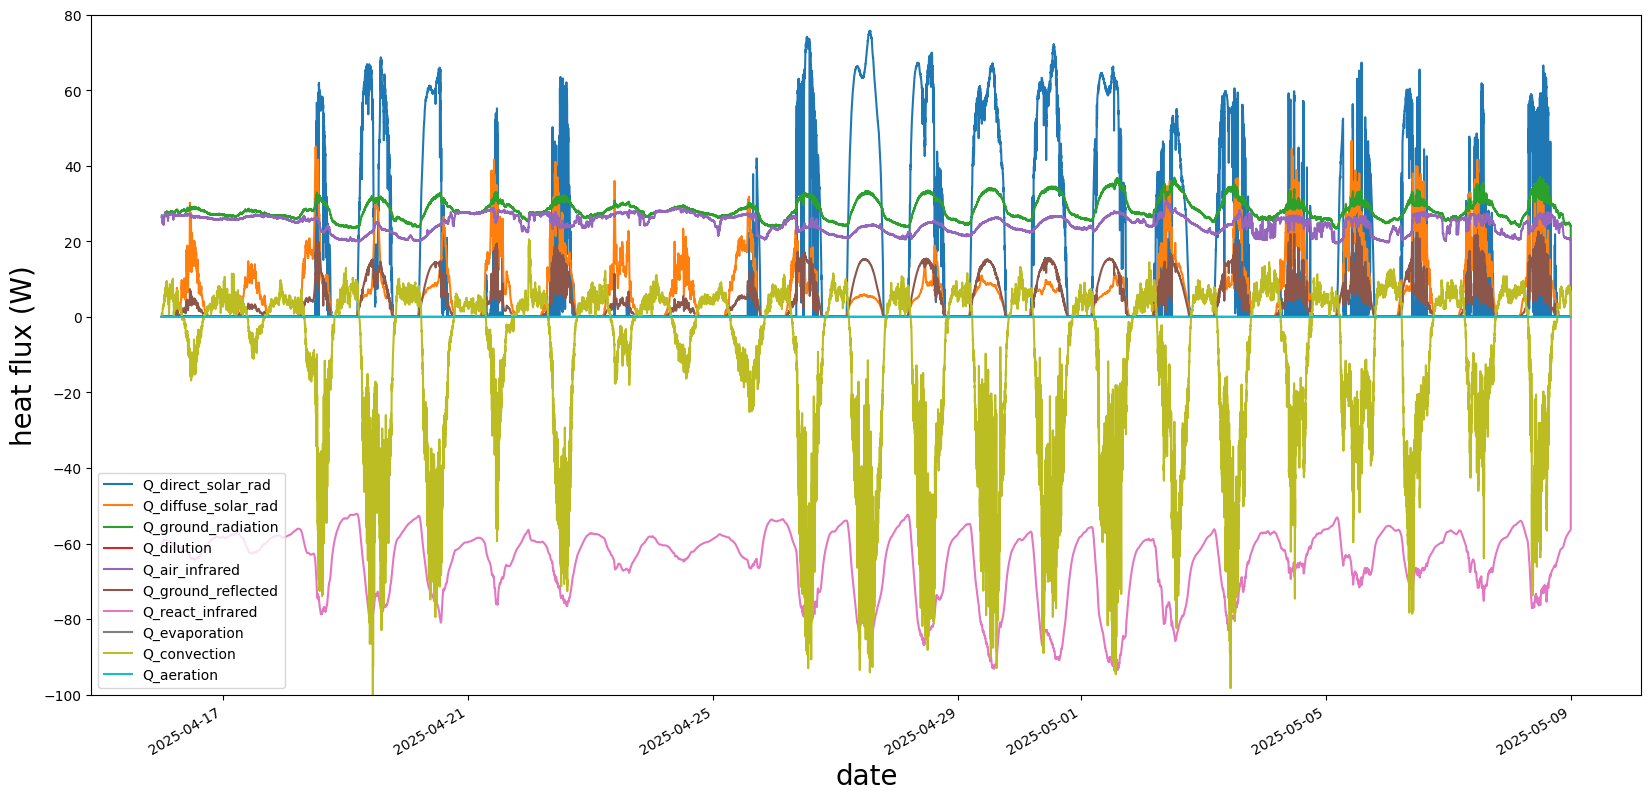

In [540]:
#reverse engineer the heat fluxes, can not extract them directly out of the heat balance function because the integration method
# integration method loops over heat balance multiple times per time step.
cooling_energy = {}
heating_energy = {}
Q_data = np.zeros((len(t_vals)+1,13))
time_index = t_span[0]/time_int
general_index = -1
for t in t_vals:
    general_index += 1
    time_index+=1
    try: 
        y = y_vals[general_index]
        #Q_direct_solar_rad = direct_solar_rad(t,y,time_index)
        Q_react_infrared = reactor_infrared_radiation(t,y,time_index)
        Q_direct_solar_rad = direct_solar_rad(t,y,time_index)
        Q_diffuse_solar_rad = diffuse_solar_rad(t,y,time_index)
        Q_air_infrared = infrared_rad_air(t,y,time_index)
        Q_dilution  = flow_harvest(t,y,time_index)
        Q_ground_radiation = ground_infrared_radiation(t,y,time_index)
        Q_evaporation = Q_evap(t,y,time_index)
        Q_ground_reflected = ground_reflected_rad(t,y,time_index)
        Q_convection =  convection(t,y,time_index)
        Q_aeration = aeration(t,y,time_index)
        overall = Q_react_infrared+Q_direct_solar_rad+Q_diffuse_solar_rad+Q_air_infrared+Q_dilution+Q_ground_radiation+Q_evaporation+Q_ground_reflected+Q_convection+Q_aeration
        extra_cooled = removed_heat(t,y,time_index,overall)
        extra_heated = added_heat(t,y,time_index,overall)
        #cooled_overview(extra_cooled,time_index)
        #heated_overview(extra_heated,time_index)
        overall = overall+extra_cooled+extra_heated
        time_index-=1
        #print(time_index)
        Q_data[general_index] = [Q_direct_solar_rad,Q_diffuse_solar_rad,Q_ground_radiation,Q_dilution,Q_air_infrared,Q_ground_reflected,Q_react_infrared,Q_evaporation,Q_convection,Q_aeration,extra_cooled,extra_heated,overall]
    except:
        print('error in calculation')
        pass
    time_index+=1                       #during the calculation the previous y values are inputted, and the time index is of the next hour, in this way this reverse engineering compensates for that

    
#Q_vals.append([Q_direct_solar_rad,Q_diffuse_solar_rad,Q_ground_radiation,Q_medium_added,Q_air_infrared,Q_ground_reflected,Q_react_infrared,Q_broth_out,Q_evaporation])
Q_data = Q_data[1:]
#columnheader = ['Q_direct_solar_rad','Q_diffuse_solar_rad','Q_ground_radiation','Q_dilution','Q_air_infrared','Q_ground_reflected','Q_react_infrared','Q_evaporation','Q_convection','Q_aeration','extra cooled','extra heated','overall']
columnheader = ['Q_direct_solar_rad','Q_diffuse_solar_rad','Q_ground_radiation','Q_dilution','Q_air_infrared','Q_ground_reflected','Q_react_infrared','Q_evaporation','Q_convection','Q_aeration']
Q_data = Q_data[:,0:10]
Fluxes = pd.DataFrame(Q_data, index= time_values,columns=columnheader)
#Fluxes.describe()
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time_values,Fluxes)
plt.legend(columnheader)
plt.gcf().autofmt_xdate()
#plt.title('magnitude of heat fluxes over time for 1 m tubular reactor for the case: '+case)
plt.ylabel('heat flux (W)',fontsize=font)
plt.xlabel('date',fontsize=font)
plt.ylim(-100,80)
time_values


[0       2025-04-16 02:00:00+00:00
 1       2025-04-16 02:01:00+00:00
 2       2025-04-16 02:02:00+00:00
 3       2025-04-16 02:03:00+00:00
 4       2025-04-16 02:04:00+00:00
                    ...           
 33115   2025-05-09 01:55:00+00:00
 33116   2025-05-09 01:56:00+00:00
 33117   2025-05-09 01:57:00+00:00
 33118   2025-05-09 01:58:00+00:00
 33119   2025-05-09 01:59:00+00:00
 Name: date_time, Length: 33120, dtype: datetime64[ns, UTC],
 0       2025-04-16 00:00:24
 1       2025-04-16 00:01:24
 2       2025-04-16 00:02:24
 3       2025-04-16 00:03:24
 4       2025-04-16 00:04:24
                 ...        
 33817   2025-05-09 11:37:24
 33818   2025-05-09 11:38:24
 33819   2025-05-09 11:39:24
 33820   2025-05-09 11:40:24
 33821   2025-05-09 11:41:24
 Name: Datum, Length: 33822, dtype: datetime64[ns]]

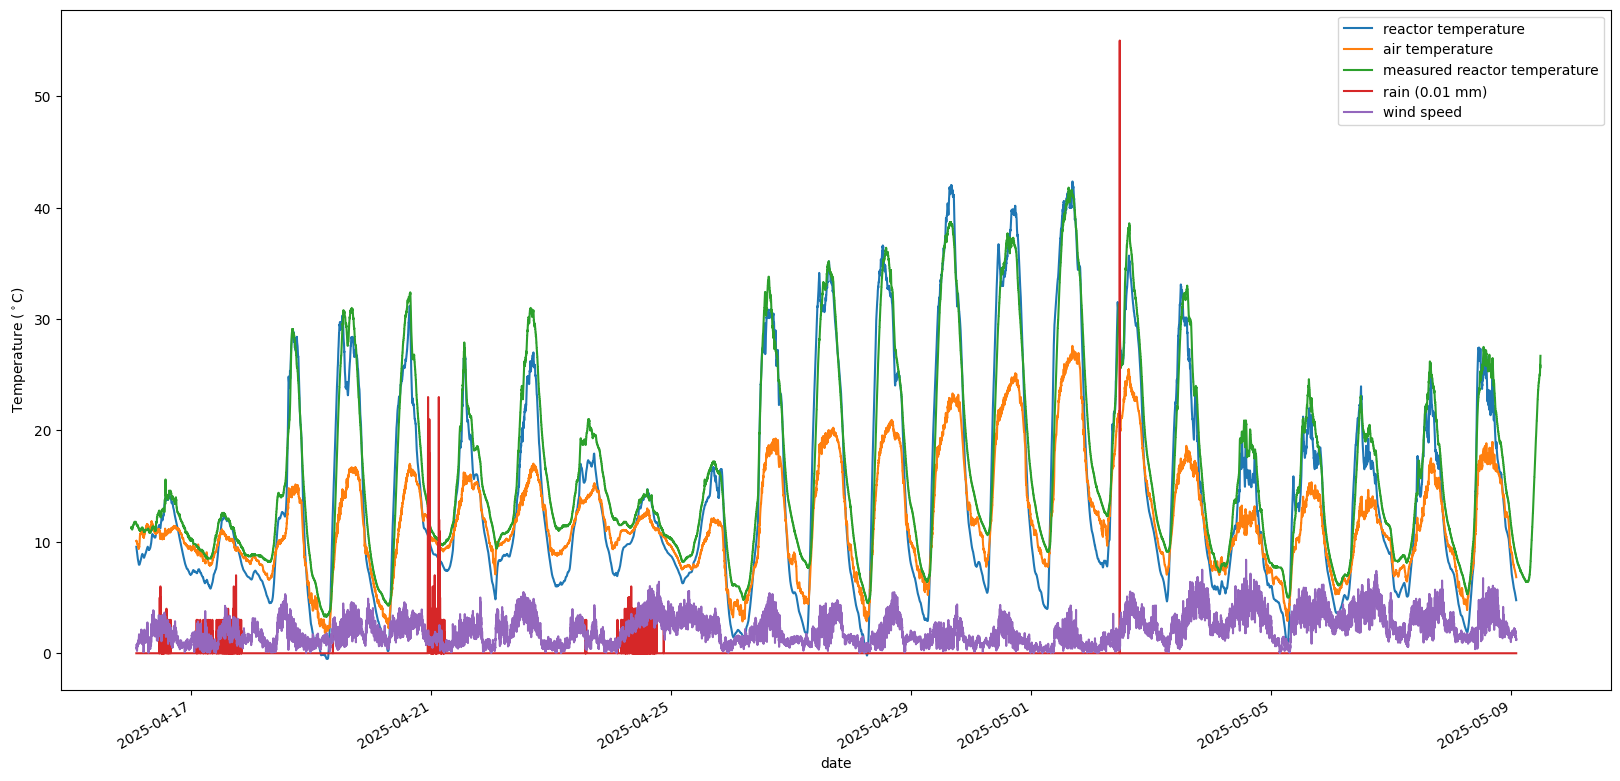

In [541]:
plt.xlabel('date')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Temperature ($^\circ$C)')
#plt.title('photobioreactor temperature profile over time for case: '+case)
plt.plot(data.date_time[t_array], y_vals-273.15,data.date_time,data.Ta-273.15,logger_data['Datum'],logger_data['T HE in[°C]'],data.date_time,data.rain*100,data.date_time,data.FF)
#plt.plot(time_values,y_vals[:-1]-273.15)
plt.gcf().autofmt_xdate()
plt.legend(['reactor temperature','air temperature','measured reactor temperature','rain (0.01 mm)','wind speed'])
#data.date_time[t_array]
time_values = time_values[0:-1] # needed for printing the fluxes
len(t_span)
test = [data.date_time[t_array],logger_data['Datum']]
test

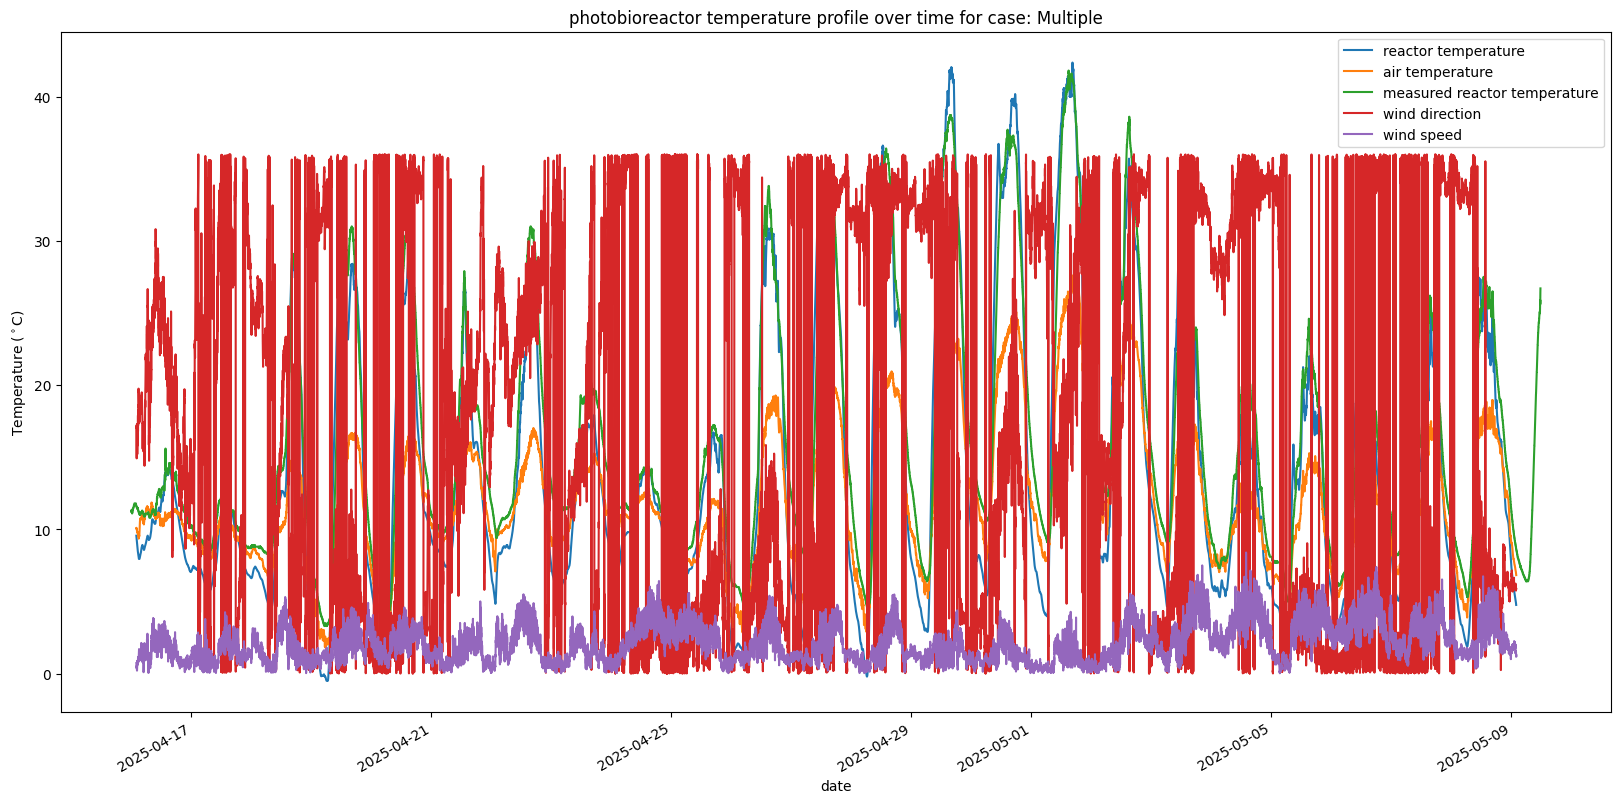

In [542]:
plt.xlabel('date')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Temperature ($^\circ$C)')
plt.title('photobioreactor temperature profile over time for case: '+case)
plt.plot(data.date_time[t_array], y_vals-273.15,data.date_time,data.Ta-273.15,logger_data['Datum'],logger_data['T HE in[°C]'],data.date_time,data.wind_direction/10,data.date_time,data.FF)
#plt.plot(time_values,y_vals[:-1]-273.15)
plt.gcf().autofmt_xdate()
plt.legend(['reactor temperature','air temperature','measured reactor temperature','wind direction','wind speed'])


(33120,)
(33120,)
end is reached


np.float64(10.435602141232868)

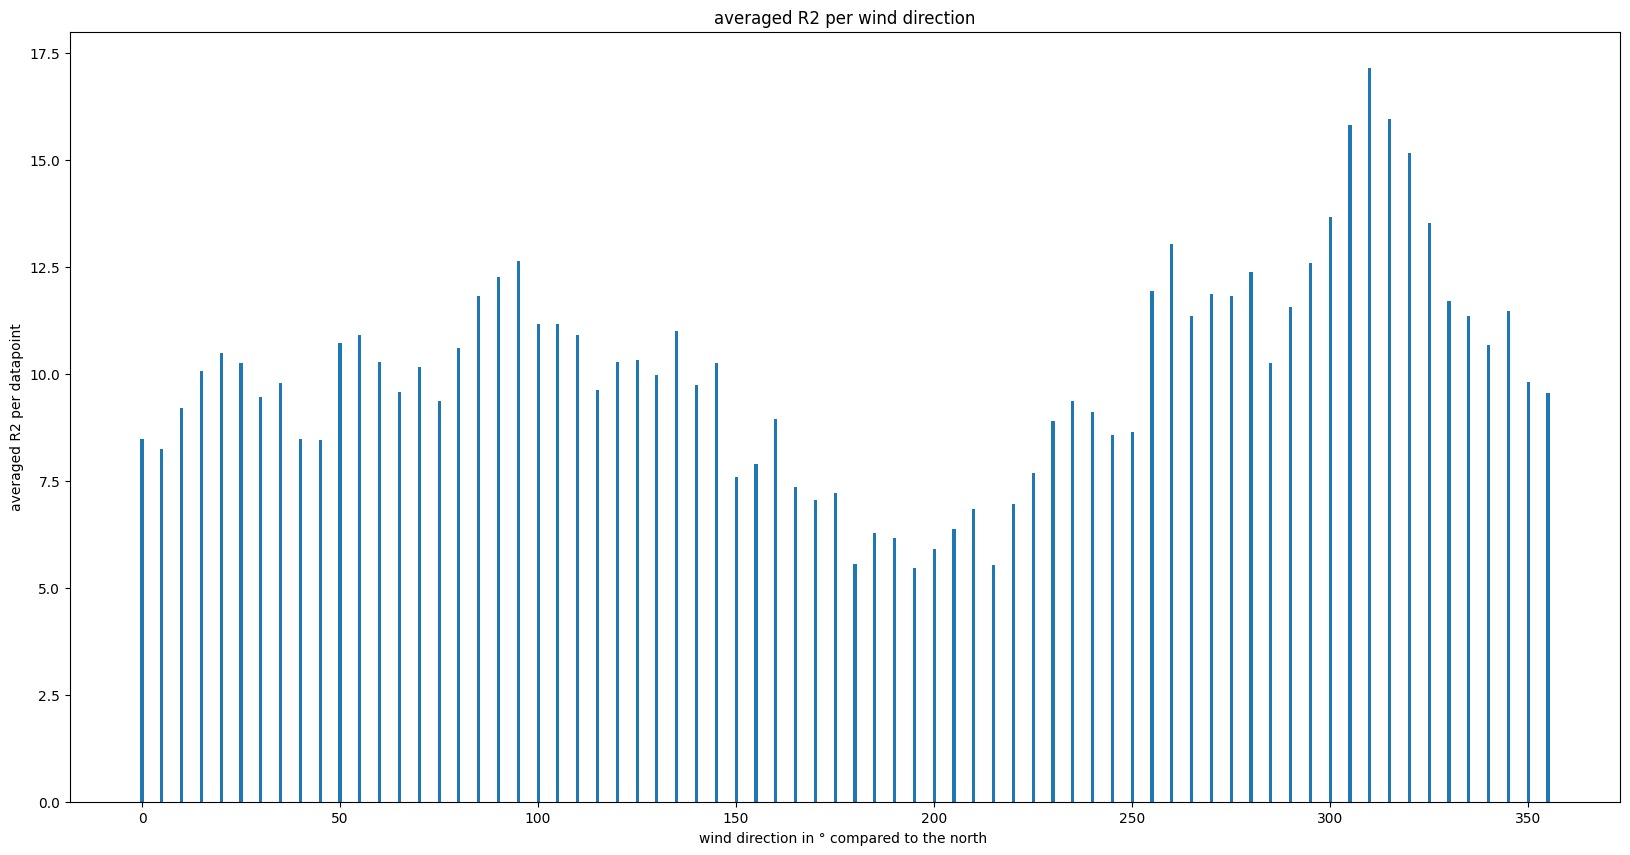

In [543]:
box_size = 5
wind_boxes = np.arange(0,360,box_size)
wind_dict = {}
for box in wind_boxes:
    wind_dict[box] = {'error_sum':0,'total':0}
#diff = y_vals-logger_data['T HE in[°C]']
plt.xlabel('wind direction in ° compared to the north ')
plt.ylabel('averaged R2 per datapoint')
plt.title('averaged R2 per wind direction')
wind_dict
data.date_time[0],logger_data['Datum'][120]
print(np.shape(y_vals))
print(np.shape(logger_data['Datum'][120:len(y_vals)+120]))
diff = np.array(y_vals-273.15 - logger_data['T HE in[°C]'][120:len(y_vals)+120])
count = -1
for i in data.wind_direction:
    count +=1
    for key in wind_dict.keys():
        if i>=key and i<key+box_size:
            try:
                wind_dict[key]['total'] +=1
                wind_dict[key]['error_sum'] += diff[count]**2
            except:
                print('end is reached')
plt.bar(wind_dict.keys(),[wind_dict[key]['error_sum']/wind_dict[key]['total'] for key in wind_dict.keys()])
R2 = sum(diff**2)/len(diff)
R2

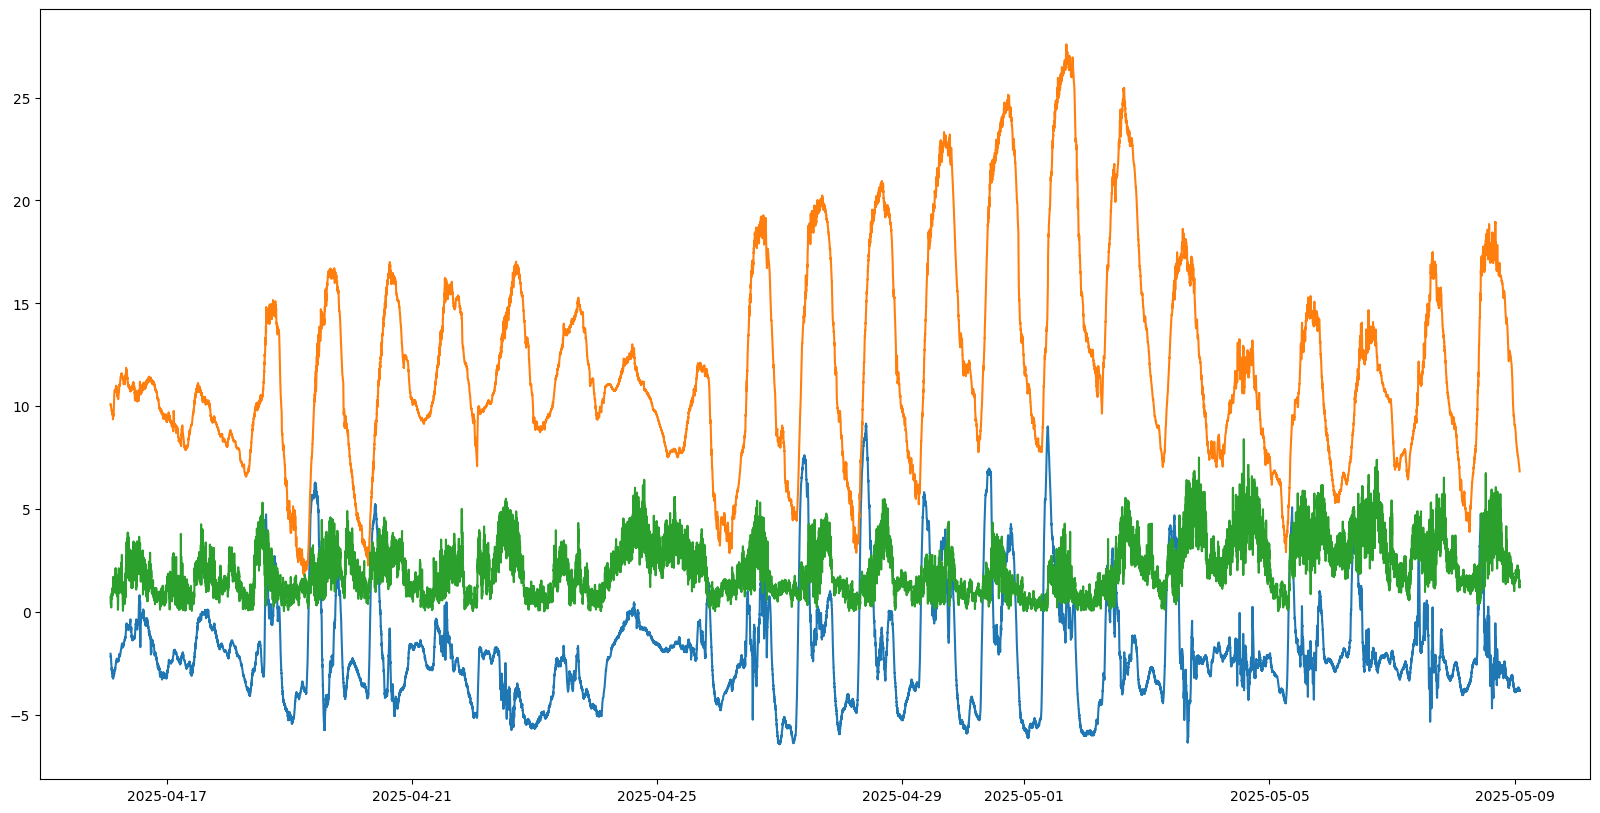

In [544]:
plt.plot(data.date_time[t_array],diff,data.date_time,data.Ta-273.15,data.date_time, data.FF)